# Chapter 4 Classification
- Logistic regression
- Linear discriminant analysis
- Quadratic discriminant analysis
- Naive Bayes
- K-nearest neighbors

## 4.1 An Overview of Classification
Happen when $Y$ is categorical
## 4.2 Why Not Linear Regression
Because coding $Y$ (at least 3 categories) as numbers such as $(1,2,3)$ implies that there is a middle value and the distances between the middle value to the other two are the same.


What about binary $Y$? We can and turn out we will have a same result as we use *linear discriminant analysis* (LDA). However, the value can exceed 0.5 and it is not meaningful for interpretation.

## 4.3 Logistic Regression
- if we use $Pr(Y)$ as $Y$, then we can have negative probabilities
### 4.3.1 The Logistic Model
We use a function that gives outputs between 0 and 1 for all values of $X$. 
Many functions meet this description. In logistic regression, we use the *logistic function*
$$
p(X)=\frac{e^{\beta_0+\beta_1X}}{1+ e^{\beta_0+\beta_1X}}
$$

To fit the model, we use a method called maximum likelihood.
With manipulation we have:
$$
log(\frac{p(X}{1-p(X)})=\beta_0+\beta_1X
$$
The left-hand side is called the *log odds* or *logit*

### 4.3.2 Estimating the Regression Coefficients
Intuition behind maximum likelihood:
1. Seek estimates for $\beta_0$ and $\beta_1$ such that the predicted probability $\hat{p}(x_i)$ of $Y$ for each observation corresponds as closely as possible to $y_i$. This can be formalized using the likelihood function:
$$
l(\beta_0,\beta_1)=\prod_{i:y_i=1}p(x_i)\prod_{i':y_{i'}=0}(1-p(x_{i'}))
$$
2. The estimates $\hat{\beta_0}$ and $\hat{\beta_01}$ are chosen to maximize this likelihood function


### 4.3.3 Making predictions
### 4.3.2 Multiple Logistic Regression
### 4.3.2 Multinomial Logistic Regression
- More than two classes
- First, we need to choose a single class to serve as the baseline; without loss of generality, we select the Kth class for this role. Then we have a model:
$$
Pr(Y=k|X=x)=\frac{e^{\beta_{k0}+ \sum_{i=1}^p\beta_{ki}x_i}}{1+ \sum_{l=1}^{K-1}e^{\beta_{l0}+ \sum_{i=1}^p\beta_{li}x_i}}
$$
for k = 1,...,K-1, and
$$
Pr(Y=K|X=x)=\frac{1}{1+\sum_{l=1}^{K-1}e^{\beta_{l0}+ \sum_{i=1}^p\beta_{li}x_i}}
$$
From which we have:
$$
log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)})=\beta_{k0}+ \sum_{i=1}^p\beta_{ki}x_i
$$
The choice of K is not important. Different K will result in different coefficients but the predicted probabiity is not changed
- An alternative coding for multinomial logistic regression, known as the softmax coding. It is equivalent to the coding just described in the sense that the fitted values, log odds, between any pair of classes, and other key model outputs will remain the same

$$
Pr(Y=k|X=x)=\frac{e^{\beta_{k0}+ \sum_{i=1}^p\beta_{ki}x_i}}{\sum_{l=1}^{K}e^{\beta_{l0}+ \sum_{i=1}^p\beta_{li}x_i}}
$$

## 4.4 Generative Models for Classification
- Logistic regression involves directly modeling $Pr(Y=k|X=x)$ using the logistic function, given by for the case of two response classes or we model the conditional distribution of the response $Y$, given the predictors $X$.
- Now we consider an alternative and less direct approach to estimating these probabilities. 
    - In this approach, we model the distribution of predictors X separately in each of the response classes
    - Then we use Bayes' theorem to flip these around into estimates for $Pr(Y=k|X=x)$
    - When the distribution of $X$ within each class is assumed to be normal, it turns out that the model is very similar in form to logistic regression.
- Reason for another method:
    - When there is substantial separation between the two classes, the parameter estimates for the logistic regression model are surprisingly unstable. The methods that we consider in this section do not suffer from this problem.
    - If the distribution of the predictors X is approximately normal in each of the classes and the sample size is small, then the approaches in this section may be more accurate than logistic regression
    - The methods in this section can be naturally extended to the case of more than two response classes. 

Let $f_k(X)= Pr(X|Y=k)$ and $\pi_k=Pr(Y=k)$, then using Bayes's theorem, we have:
$$
Pr(Y=k|X=x)= \frac{\pi_kf_k(x)}{\sum_{l=1}^K\pi_lf_l(x)}
$$

Notation: $p_k(x)=Pr(Y=k|X=x)$; this is the posterior probability that an observation $X=x$ belongs to the kth class.
Technically, this definition is only correct if $X$ is a qualitative random variable. If $X$ is quatitative, then $f_k(x)dx$ corresponds to the probability of $X$ falling in a samll region $dx$ around x

Instead of directly computing the posterior probability $p_k(x)$, we can simply plug in estimates of $\pi_k$ and $f_k(x)$.
$\pi_k$ is easy to estimate but not $f_k(x)$. Therefore, we use different methods to estimate $f_k(x)$. Below would be three different estimates of $f_k(x)$

### 4.4.1 Linear Disciminant Analysis for p =1
$f_k(x)$ is assumed to be *normal* or *Gaussian*
In the one-dimensional setting (p=1), the normal density takes the form
$$
f_k(x)=\frac{1}{\sqrt{2\pi}\sigma_k}exp(-\frac{1}{2{\sigma_k}^2}(x-\mu_k^2))
$$
where $\mu_k$ and $\sigma^2_k$ are the mean and variance parameter for the kth class. For now, let further assume equal variance (i.e. $\sigma _1^2=...=\sigma_K^2$)
Replacing these assumption into Bayes theorem, we have:
$$
Pr(Y=k|X=x)= \frac{\pi_k\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{1}{2{\sigma}^2}(x-\mu_k^2))}{\sum_{l=1}^K\pi_l\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{1}{2{\sigma}^2}(x-\mu_l^2))}
$$

This is equivalent to assigning the observation to the class for which 
$$
\delta_k(x)=x\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+log(\pi_k)
$$
is largest

In practice, even if we are quite certain of our assumption that $X$ is
drawn from a Gaussian distribution within each class, to apply the Bayes
classifier we still have to estimate the parameters $\mu_1,...,\mu_K,\pi_1,...,\pi_K$ and $\sigma^2$

In *linear discriminant analysis* (LDA) method approximates the Bayes classifier by plugging estimates for $\pi_k,\mu_k,$ and $\sigma^2$ using:
$$
\hat{\mu}_k=\frac{1}{n_k}\sum_{i:y_i=k}x_i\\
\sigma^2 = \frac{1}{n-K}\sum_{k=1}^K\sum_{i:y_i=k}(x_i-\hat{\mu}_k^2)\\
\hat{\pi}_k = n_k/n

$$

The world linear stems from the fact that the discriminant functions

$$
\hat{\delta}_k(x)=x\frac{\hat{\mu}_k}{\hat{\sigma}^2}-\frac{\hat{\mu}_k^2}{2\hat{\sigma}^2}+log(\hat{\pi}_k)
$$
are linear functions of x

### 4.4.2 Linear Discriminant Analysis for p>1
We now extend the LDA classifier to the case of multiple predictors. For this, we asusme that $X=(X_1,...,X_p)$ is drawn from a* multivariate Gaussian* distribution with a class-specific mean vector and a common covariance matrix.
#### Review of multivariate Gaussian distribution
- Assumes that ach individual predictor follows a one-dimensional normal distribution
- Some correlation between each pair of predictors
- Write as $X\sim N (\mu,\mathbf{\Sigma})$
- Formally, the multivariate Gaussian density is defined as 
$$
f(x)= \frac{1}{(2\pi)^{p/2}|{\mathbf{\Sigma}}|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\mathbf{\Sigma}^{-1}(x-\mu))
$$

Plug these in the Bayes theorem with some algebra, this is equivalent to assigning the observation to the class for which :
$$
\delta_k(x)=x^T\mathbf{\Sigma^{-1}}\mu_k-\frac{1}{2}\mu_k^T\mathbf{\Sigma}^{-1}\mu_k+log(\pi_k)
$$
note that $\delta(x)$ is a linear function of x and LDA rule depends on x only

#### Caveats of LDA
- First of all, training error rates will usually be lower than test error
rates, which are the real quantity of interest. The higher the ratio of parameters p to number of samples n, the more we expect this overfitting to play a role
- Second, disproportions between $\pi_k$ among classes can lead to a small error rate with the trivial null classifier. 
    - Can use confusion matrix for class-specific performance
    - in medical term: sensitivity and specificity

Why LDA may not be a good fit for class-specific performance?
- LDA is trying to approximate the Bayes classifier, which has the lowest *total* error rate out of all classifiers.
    - Hence, class-specific performance may not be a good fit
How can we improve?
- Note that Bayes classifier and LDA uses a threshold of 0.5 for te posterior probability.
    - Therefore, if we are concerened about a specific class, then we can consider lowering or increasing this threshold
    - Decision on which threshold value is best must be based on domain knowledge, such as detailed information about the costs associated.
- The ROC curve is a popular graphic for simultaneously displaying the two types of errors for all possible thresholds. *short for receiver operating characteristics*
    - X axis: 1- specificity
    - Y axis: sensitivity
    - The overall performance of a classifier, summarized over all possible thresholds, is given by the area under the (ROC) curve (AUC)

| Name | Definition | Synonyms |
| --- | --- | --- |
| False Positive rate | FP/N | Type I error, 1-Specificity |
| True Positive rate | TP/P | 1- Type II error, power, sensitivity, recall |
| Positive Prediction value | TP/P* | Precision, 1-false discovery proportion |
| Negative Prediction value | TN/N* |  |


With N,P being true Negative and Positive while N*, P* being number of nagative and positive prediction respectively.

### 4.4.3 Quadratic Discriminant Analysis
Similar with LDA, QDA assumes the observations from each class are drwan from a Gaussian distribution
Unline LDA, QDA assumes that each class has its own covariance matrix. That is,it assumes that an observation from the kth class is of the form $X ∼ N(μk,Σk)$, where $Σ_k$ is a covariance matrix for the kth class.

##### Why does is matter whether or not we asusme that the K classes share a common covariance matrix? In other words, why would one prefer LDA to QDA, or vice-versa?

- The bias-variance trade-off.
- When there are p predictors, estimating a covariance matrix requires estimating p(p+1)/2 parameters for LDA and Kp(p_1)/2 parameters for QDA
    - Consequently, QDA is more flexible classifier than LDA, and so has substantially higher variance. Which can lead to lower prediction performance.
    - However, if LDA's assumtion that the K classes share a common covariance matrix is badly off, then LDA can suffer from high bias
- Roughly speaking, LDA tends to be a better bet than QDA if there are relatively few training observations and so reducing variance is crucial.
- In contrast, QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern, or if the assumption of a common covariance matrix for the K classes is clearly untenable

### 4.4.4 Naive bayes
Instead of make the assumption of the form of $f_k(x)$, Naive Bayes model assume that 
<h1><center>
within the kth class, the p predictors are independent
</center></h1>

Stated mathematically, this assumption means that for $k=1,...,K$,
$$
f_k(x)= f_{k1}(x_1)\times ...\times f_{kp}(x_p)
$$
where $f_{kj}$ is the density function of the $j$th predictor among obserations in the $k$th class

#### Why is this assumption so powerful? 
- Essentially, estimating a p-dimensional density function is challenging because we must consider not only the marginal distribution of each predictor — that is, the distribution of each predictor on its own— but also thejoint distribution of the predictors — that is, the association between the different predictors.
- Do we really believe the naive Bayes?
    - Nah ah, but most of the time, it often leads to pretty decent results, especially in settings where n is not large enough relative to p for us to effectively estimate the joint distribution of the predictors within each class.
    - It is also very convenient
    - In fact, since estimating a joint distribution requires such a huge amount of data, naive Bayes is a good choice in a wide range of settings.

#### Steps of Naive Bayes model

Once we have made the naive Bayes assumption, we have:

$$
Pr(Y=k|X=x)= \frac{\pi_kf_{k1}(x_1)...f_{kp}(x_p)}{\sum_{l=1}^K\pi_lf_{l1}(x_1)...f_{lp}(x_p)}
$$

If $X_j$ is quatitative, then we can assume that $X_j|Y=k \sim N(\mu_{jk},\sigma_{jk}^2)$

If $X_j$ is quantitative, use a non=parametric estimate for $f_{kj}$.

    - We can estimate $f_{kj}(x_j) using the fraction of the training observations in the kth class$
    
    - Also kernel density estimator, which essensitally a smoothed version of a histogram

If $X_j$ is qualitative, then we can simply count the proportion of training observations for the jth predictor corresonding to each class.

## 4.5 A comparison of Classification Methods
### 4.5.1 An analytical comparison
#### LDA

$$
log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)})= log(\frac{\pi_k}{\pi_K})-\frac{1}{2}(\mu_k+\mu_K)^T\mathbf{\Sigma^{-1}}(\mu_k-\mu_K)+ x^T\mathbf{\Sigma^{-1}}(\mu_k-\mu_K)\\
log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)})= a_k + \sum_{j=1}^pb_{kj}x_j

$$
where $a_k=log(\frac{\pi_k}{\pi_K})-\frac{1}{2}(\mu_k+\mu_K)^T\mathbf{\Sigma^{-1}}(\mu_k-\mu_K)$ and $b_{kj}$ is the jth component of $\mathbf{\Sigma^{-1}}(\mu_k-\mu_K)$

### QDA
$$

log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)})= a_k + \sum_{j=1}^pb_{kj}x_j + \sum_{j=1}^p\sum_{l=1}^pc_{kjl}x_jx_l
$$

### Naive Bayes

$$

log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)})= log(\frac{\pi_k}{\pi_K})+ \sum_{j=1}^plog(\frac{f_{kj}(x_j)}{f_{Kj}(x_j)})\\
log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)})= a_k + \sum_{j=1}^pg_{kj}x_j

$$
with the right-handside takes the form of a generalized additive model

#### Conclusion

LDA is a special case of QDA with $c_{kjl}= 0$ for all $j=1,...,p,l=1,...,p$ and $k=1,...,K$

Any classifier with a linear decision boundary is a special case of naive Bayes with $g_{kj}(x_j) = b_{kj}(x_j)$. Therefore, LDA is also a special case of naive Bayes.

For naive Bayes if we use a one-dimensional Gaussian distribution $N(\mu_{kj,\sigma^2_j})$ and $\mathbf{\Sigma}$ restricted to be a diagonal matrix with ith diagonal element equal to $\sigma^2_j$

Neither QDA nor naive Bayes is a special case of the other. Naive Bayes can produce a more flexible fit, however, it is restricted to a purely additive fit. QDA, on the other hand, allow for interaction terms. Therefore, QDA has the potential to be more accurate in settings where interactions among the predictors are important in discriminating between classes.

Logistic regression and LDA share a similar form of linear function. However, LDA fit better when $X_1,...,X_p$ follow normal distribution within each class. and logistic regression perform better when the variables do not follow normal distribution.

#### What about KNN?

- Because KNN is completely non-parametric, we can expect this ap- proach to dominate LDA and logistic regression when the decision boundary is highly non-linear, provided that n is very large and p is small.

- Require n>>p to provide accurate classification

- If n/p is not that big but the boundary is non-linear, consider QDA

- KNN does not tell us which predictors are important


## 4.6 Generalized Linear Models

$Y$ can also be neither qualitative nor quantitative but discrete counts.

### 4.6.1 Linear Regression approach on count
At first glance, linear regression provides reasonable and intuitive results.
Some problems:
- Some predicted data is negative which make no sense for discrete counts
- The assumption of equal variance may not apply
- Transform $Y$ may help but not always

### 4.6.2 Poisson Regression on the Bikeshare Data

#### Poisson distribution:
$$
Pr(Y=k)=\frac{e^{-\lambda}\lambda^k}{k!} \textit{ for } k=0,1,2,...
$$

With $\lambda>0$ as the expected value of $Y$ and the variance of $Y$. Meaning, if $Y$ follows the Poisson distribution, then the larger the mean of $Y$, the larger its variance

For this model we would try to estimate $\lambda(X_1,...,X_p)$:
$$
log(\lambda(X_1,...,X_p)) = \Beta_0 + \sum_{i=1}^p\beta_iX_i
$$

Notice that we use $\log(\lambda)$ instead of $\lambda$ because we want to make sure $\lambda$ to be positive

Some important distinctions between the Poisson regression model and the linear regression model are as follows:

- Interpretation

- Mean-variance relationship:

- Nonnegative fitted values

### 4.6.3 Generalized Linear Models in Greater Generality
For the three type of regression (linear, logistic and Poisson)
1. Each approach uses predictors to predict a response
2. Each approach models the mean of Y as a function of the predictors but different *link funtion* $\eta(\mu)$
    - For linear regression: $\eta(\mu)=\mu$
    - For Logistic regression: $\eta(\mu)=\log(\mu/(1-\mu))$
    - For Poisson regression: $\eta(\mu)=log(\mu)$
3. All three distributions are members of a wider class of distributions, known as the *exponential family*.
4. In general, we can perform a regression by modeling the response $Y$ as coming from a particular member of the exponential family, and then transforming the mean of the response so that the transfomed mean is a linear function of the predictors.
    - Any regression approach that follows this very general recipe is known as *generalized linear model*

## 4.7 Lab: Logistic Regression, LDA, QDA, and KNN

### 4.7.1 The Stock Market Data

In [1]:
# Import old modules
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [2]:
# Import new modules
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 

In [4]:
# load the Smarket dataset
Smarket = load_data('Smarket')


In [5]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [10]:
display(Smarket.corr())

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


correlations between the lagged return variables and today's return are close to zero. The only substantial correlation is between `Year` and `Volume`

<AxesSubplot: >

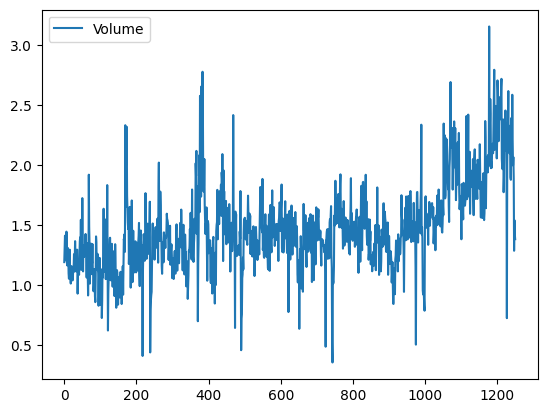

In [11]:
Smarket.plot(y="Volume")

### 4.7.2 Logistic Regresion
We will try to predict `Direction`

In [13]:
# create a subset of predictors
allvars = Smarket.columns.drop(['Today','Direction','Year'])
# specify design
design = MS(allvars)
X= design.fit_transform(Smarket)
y=Smarket.Direction =="Up"
glm=sm.GLM(y,
           X,
           family= sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


    No strong evidence due to high p-values

In [14]:
# making predictions:
probs = results.predict()
labels= np.array(['Down']*1250)
labels [probs > 0.5]= "Up"
labels[:100]

array(['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down',
       'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down'], dtype='<U4')

In [16]:
# calculate confusion_table
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


At first glance, the model is working a bit better than random guessing. Remember though, this is the training test error rate

In [18]:
# Using train and test data
train = Smarket.Year < 2005
Smarket_train = Smarket.loc[train] 
Smarket_test = Smarket.loc[~ train] 
Smarket_test.shape

(252, 9)

In [21]:
X_train, X_test= X.loc[train], X.loc[~train]
y_train, y_test= y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [22]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [24]:
labels = np.array(["Down"]*252)
labels[probs>0.5]="Up"
confusion_table(labels,L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


Recall that logistic regression model had very undershelming p-values associated with all of the predictors. Perhaps by removing the variables , we can obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in turn yield an improvement. 

In [27]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train] 
glm_train = sm.GLM(y_train,
X_train ,
family=sm.families.Binomial()) 
results = glm_train.fit()
probs = results.predict(exog=X_test) 
labels = np.array(['Down']*252) 
labels[probs>0.5] = 'Up' 
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


### 4.7.3 Linear Discriminant Analysis


In [28]:
lda = LDA(store_covariance=True)
# since LDA automatically add a intercep column, \
    # remove the column from X_train and X_test
X_train, X_test = [x.drop(columns="intercept") for x in [X_train,X_test]]
lda.fit(X_train,L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [31]:
# extract the means
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

The `means_` attribute show the mean of predictors within each class. These suggest that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines.

The package `sklearn` typically uses the trailing `_` to denote a quantity estimated when using the `fit()` method.

In [32]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [33]:
lda.priors_

array([0.49198397, 0.50801603])

In [34]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

These values provide the linear combination of `Lag1` and `Lag2` that are used to form the LDA decision rule.

In [35]:
lda_pred= lda.predict(X_test)
confusion_table(lda_pred,L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [ ]:
lda_prob = lda.predict_proba(X_test)
np.all(np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred )

In [40]:
np.all(np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred )

True

### 4.7.4 Quadratic Discriminant Analysis

In [41]:
qda=QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [44]:
qda.means_, qda.priors_, qda.classes_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]),
 array(['Down', 'Up'], dtype=object))

In [45]:
# covariaces per class
qda.covariance_

[array([[ 1.50662277, -0.03924806],
        [-0.03924806,  1.53559498]]),
 array([[ 1.51700576, -0.02787349],
        [-0.02787349,  1.49026815]])]

In [46]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [47]:
np.mean(qda_pred==L_test)

0.5992063492063492

### 4.7.5 Naive Bayes
This use the `GaussianNB()` in which each quantitative feature using a Gaussian distribution. However, a kernal density method can also be used to estimate the distributions

In [48]:
NB=GaussianNB()
NB.fit(X_train,L_train)

GaussianNB()

In [50]:
NB.classes_, NB.class_prior_, NB.theta_

(array(['Down', 'Up'], dtype='<U4'),
 array([0.49198397, 0.50801603]),
 array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]))

In [51]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [55]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [56]:
np.mean(nb_labels==L_test)

0.5952380952380952

### 4.7.6 K-Nearest neighbors

In [58]:
# Initiating the model
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred,L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [59]:
# repeate the analysis with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)
 

0.5317460317460317

Note that KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, 

    the scale of the variables matter in KNN

A good way to handle this problem is to standardize the data so that all variables are given a mean of zero, and a standard deviation of one.
`StandardScaler()` transformation

In [61]:
#loading data
Caravan = load_data('Caravan') 
Purchase = Caravan.Purchase 
Purchase.value_counts()
 

No     5474
Yes     348
Name: Purchase, dtype: int64

In [62]:
#feature processing
feature_df = Caravan.drop(columns=['Purchase'])
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
X_std= scaler.fit_transform(feature_df)
feature_std = pd.DataFrame(X_std,columns = feature_df.columns)

In [63]:
# Create train and test data set
(X_train,
X_test ,
y_train ,
y_test) = train_test_split(feature_std,
Purchase , test_size=1000, random_state=0)

In [64]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")
 

(0.111, 0.067)

At first glance, this may appear to be fairly good. However, since just over 6% of customers purchased insurance, we could get the error rate down to almost 6% by always predicting `No` regardless of the values of the predictors! This is known as the *null rate*

In [65]:
confusion_table(knn1_pred,y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


#### Tuning parameters
The number of neighbors in KNN is referred to as a *tuning parameter*, also referred to as a *hyperparameter*. We do not know a priori what value to use. It is therefore of interest to see how the classifier performs on test data as we vary these parameters. This can be achieved with a *for* loop 

In [67]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test) 
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
    ' # who did rent {2:d}, accuracy {3:.1%}') 
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes'] 
    print(templ.format(
    K,
    pred , did_rent ,
    did_rent / pred))

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%


#### Comparison to Logistic Regression

    Note that sklearn fit ridge regression version of logistic regression

This can be modified by appropriately setting the argument `C`


In [68]:
logit = LogisticRegression(C=1e10, solver='liblinear') 
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 5, 'Yes', 'No') 
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,933,67
Yes,0,0


The results use a threshold of 0.5 Let's change that

In [69]:
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No') 
confusion_table(logit_labels, y_test)
 

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


We get a much better result 9/29=0.31

### 4.7.7 Linear and Poisson Regression on the Bikeshare Data

In [71]:
# Loading data
Bike = load_data('Bikeshare')
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

#### Linear regression


In [72]:
X = MS(['mnth', 'hr',
    'workingday', 'temp',
    'weathersit']).fit_transform(Bike) 
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit() 
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [76]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')
X2 = MS([mnth_encode, hr_encode ,
'workingday', 'temp','weathersit']).fit_transform(Bike) 
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm) 
S2
 
 

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


Column(idx='hr', name='hr', is_categorical=True, is_ordinal=False, columns=(), encoder=Contrast(method='sum'))

In ML_2, the coefficients of `hr` and `mnth` will always sum to zero, and can be interpreted as the difference from the mean level
As long as you interpret the model output correctly in light of the coding used, the coding really does not matter.

#### Poisson Regression

In [78]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()

In [79]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef'] 
coef_month = pd.concat([coef_month,
pd.Series([-coef_month.sum()], index=['mnth[Dec]'])]) 
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr, pd.Series([-coef_hr.sum()],
index=['hr[23]'])])